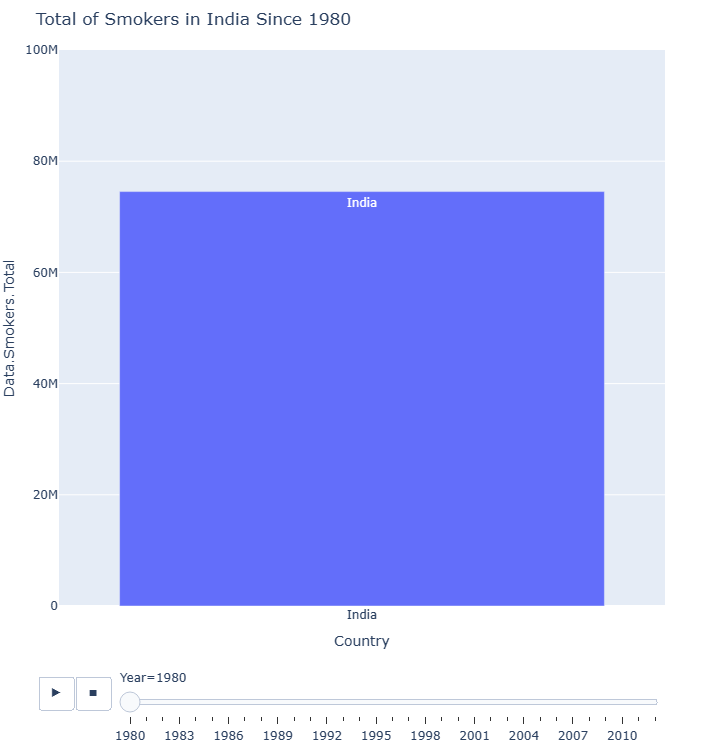

In [39]:
import plotly.express as px 

anim = df.query("Country == 'India'").sort_values(by='Data.Smokers.Total', ascending=False).groupby('Year').head(20).sort_values(by=['Year', 'Data.Smokers.Total'], ascending=[True, False])
fig = px.bar(anim, y='Data.Smokers.Total', x='Country', range_y=[0, 100000000], animation_frame="Year", text=anim['Country'])
fig.update_layout(title="Total of Smokers in India Since 1980", height=750, width=1500, margin={"r": 50, "t": 50, "l": 0, "b": 0})
fig.show()


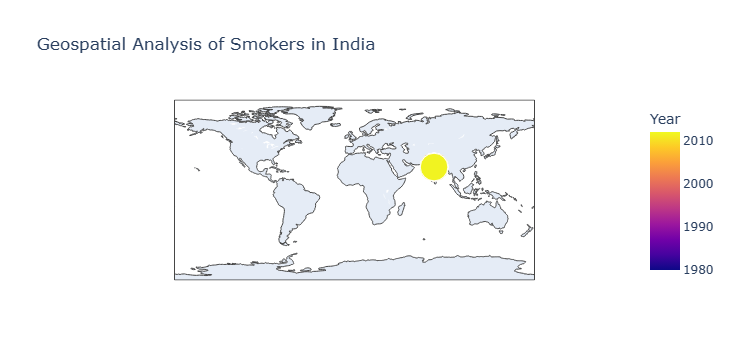

In [40]:
import plotly.express as px

# Geospatial Analysis
fig = px.scatter_geo(df.query("Country == 'India'"), locations="Country", locationmode='country names', color="Year", size='Data.Smokers.Total', title='Geospatial Analysis of Smokers in India')
fig.show()


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



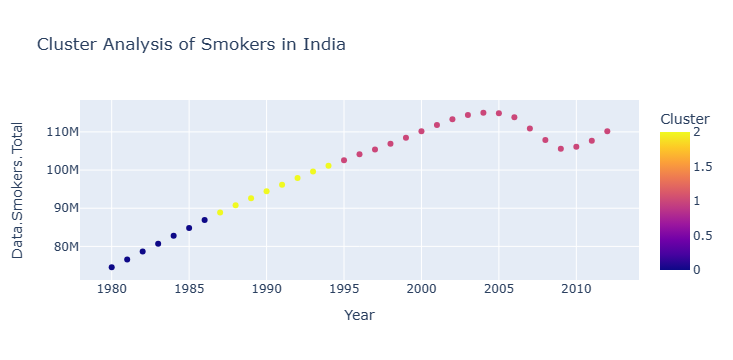

In [41]:
import plotly.express as px
from sklearn.cluster import KMeans


# Cluster Analysis
X = anim[['Year', 'Data.Smokers.Total']]
kmeans = KMeans(n_clusters=3).fit(X)
anim['Cluster'] = kmeans.labels_

fig = px.scatter(anim, x='Year', y='Data.Smokers.Total', color='Cluster', title='Cluster Analysis of Smokers in India')
fig.show()


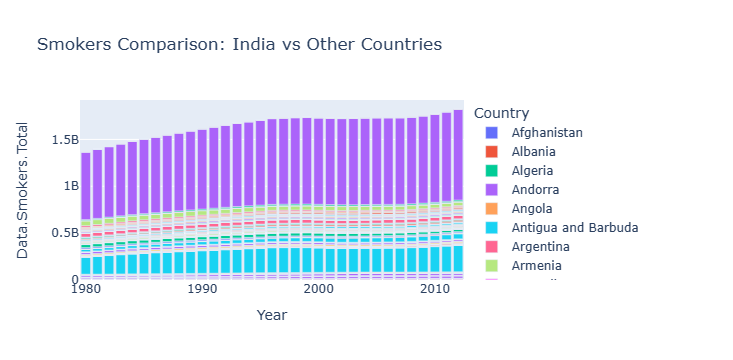

In [42]:
import plotly.express as px


# Comparison with Other Countries
fig = px.bar(df.query("Country != 'India'"), x='Year', y='Data.Smokers.Total', color='Country', title='Smokers Comparison: India vs Other Countries')
fig.show()


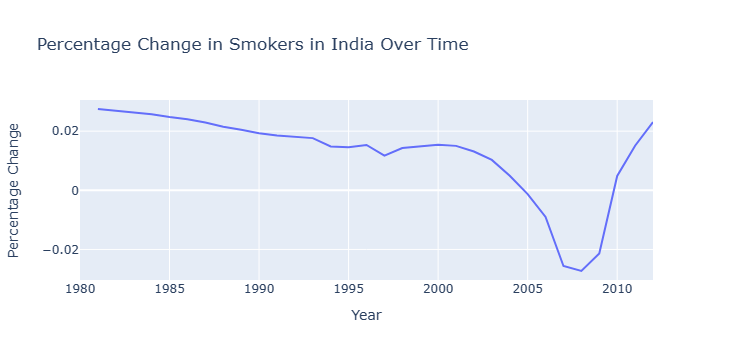

In [43]:
import plotly.express as px

# Calculate percentage change
anim['Percentage Change'] = anim.groupby('Country')['Data.Smokers.Total'].pct_change()

# Percentage Change Analysis
fig = px.line(anim, x='Year', y='Percentage Change', title='Percentage Change in Smokers in India Over Time')
fig.show()


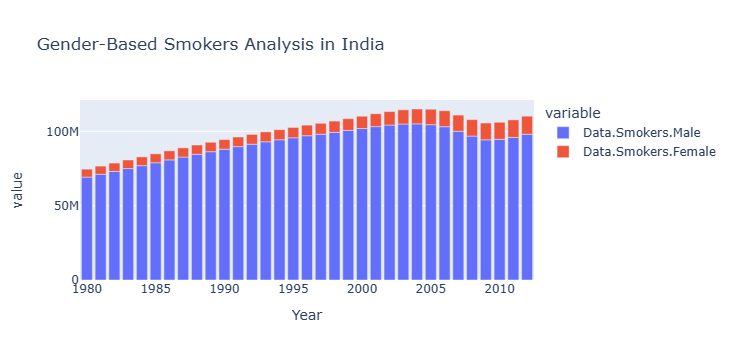

In [44]:
import plotly.express as px

# Your existing code
# ...

# Gender-Based Analysis
fig = px.bar(anim, x='Year', y=['Data.Smokers.Male', 'Data.Smokers.Female'], title='Gender-Based Smokers Analysis in India')
fig.show()


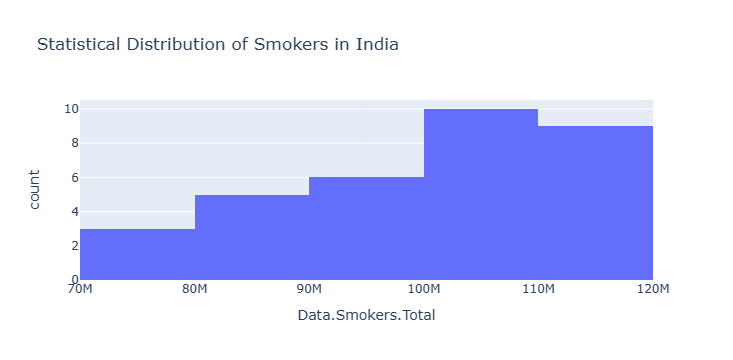

In [45]:
import plotly.express as px

# Your existing code
# ...

# Statistical Distribution Analysis
fig = px.histogram(anim, x='Data.Smokers.Total', title='Statistical Distribution of Smokers in India')
fig.show()


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



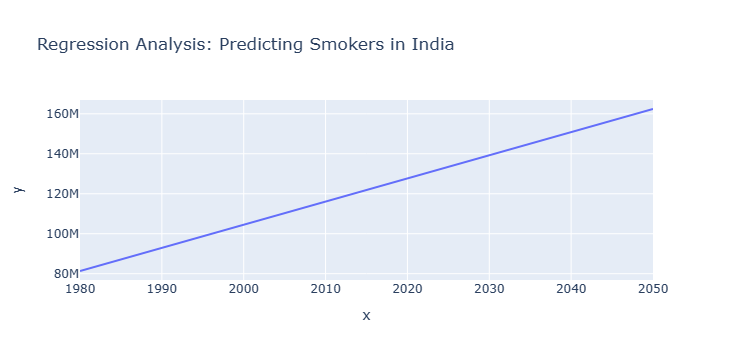

In [46]:
import plotly.express as px
import numpy as np
from sklearn.linear_model import LinearRegression

# Your existing code
# ...

# Regression Analysis
model = LinearRegression()
model.fit(anim[['Year']], anim['Data.Smokers.Total'])
future_years = np.arange(1980, 2051)
predicted_totals = model.predict(future_years.reshape(-1, 1))

fig = px.line(x=future_years, y=predicted_totals, title='Regression Analysis: Predicting Smokers in India')
fig.show()


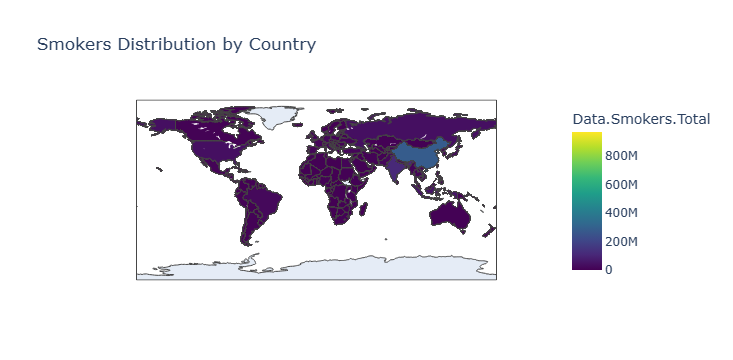

In [50]:
import plotly.express as px

fig = px.choropleth(df, locations="Country", locationmode='country names', color="Data.Smokers.Total",
                    hover_name="Country", color_continuous_scale="Viridis",
                    title='Smokers Distribution by Country')
fig.show()



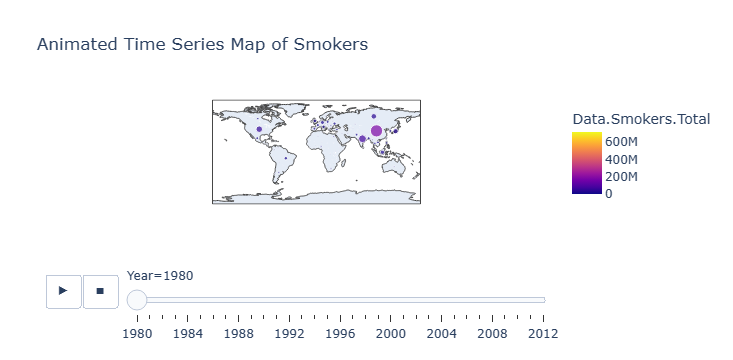

In [51]:
import plotly.express as px

fig = px.scatter_geo(df, locations="Country", locationmode='country names', color="Data.Smokers.Total",
                     size="Data.Smokers.Total", animation_frame="Year",
                     title='Animated Time Series Map of Smokers')
fig.show()


In [54]:
# Descriptive Statistics
mean_cigarettes = df['Data.Daily cigarettes'].mean()
median_cigarettes = df['Data.Daily cigarettes'].median()
std_cigarettes = df['Data.Daily cigarettes'].std()

print(f"Mean: {mean_cigarettes:.2f}, Median: {median_cigarettes:.2f}, Standard Deviation: {std_cigarettes:.2f}")


Mean: 19.85, Median: 19.10, Standard Deviation: 13.75


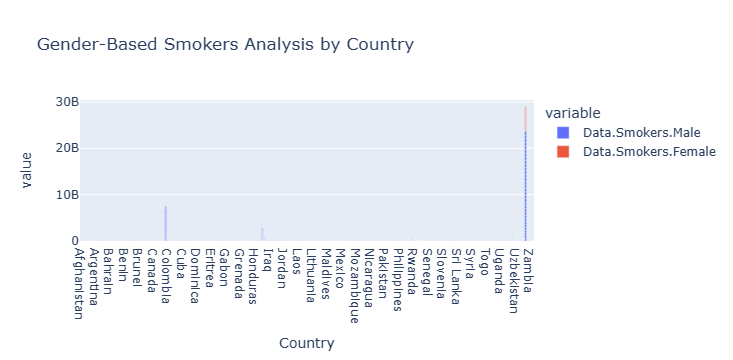

In [55]:
import plotly.express as px

fig = px.bar(df, x='Country', y=['Data.Smokers.Male', 'Data.Smokers.Female'], title='Gender-Based Smokers Analysis by Country')
fig.show()


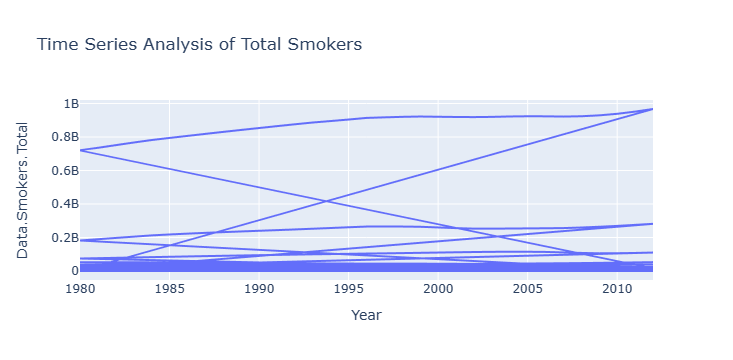

In [56]:
import plotly.express as px

fig = px.line(df, x='Year', y='Data.Smokers.Total', title='Time Series Analysis of Total Smokers')
fig.show()


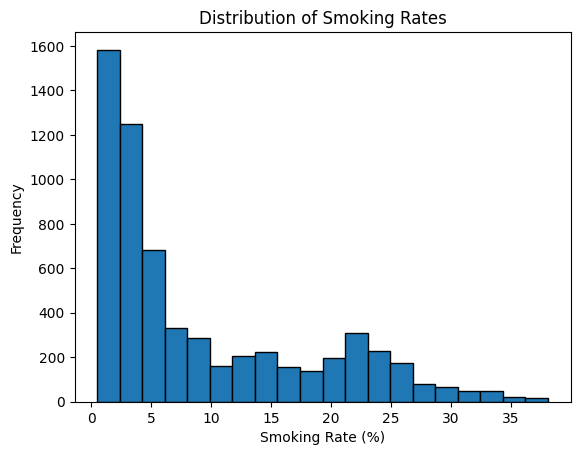

In [57]:
import matplotlib.pyplot as plt

plt.hist(df['Data.Percentage.Total'], bins=20, edgecolor='k')
plt.xlabel('Smoking Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Smoking Rates')
plt.show()


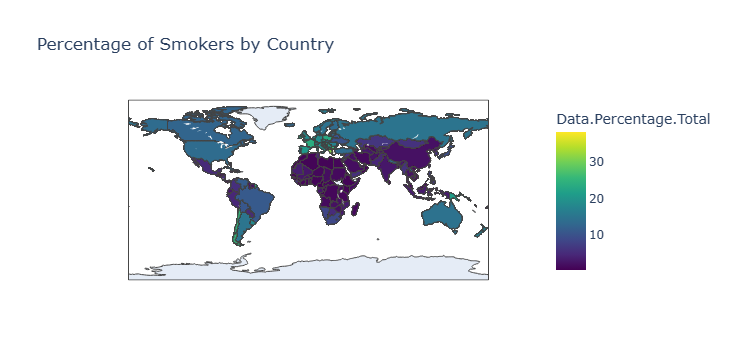

In [59]:
import plotly.express as px

fig = px.choropleth(df, locations="Country", locationmode='country names', color="Data.Percentage.Total",
                    hover_name="Country", color_continuous_scale="Viridis",
                    title='Percentage of Smokers by Country')
fig.show()


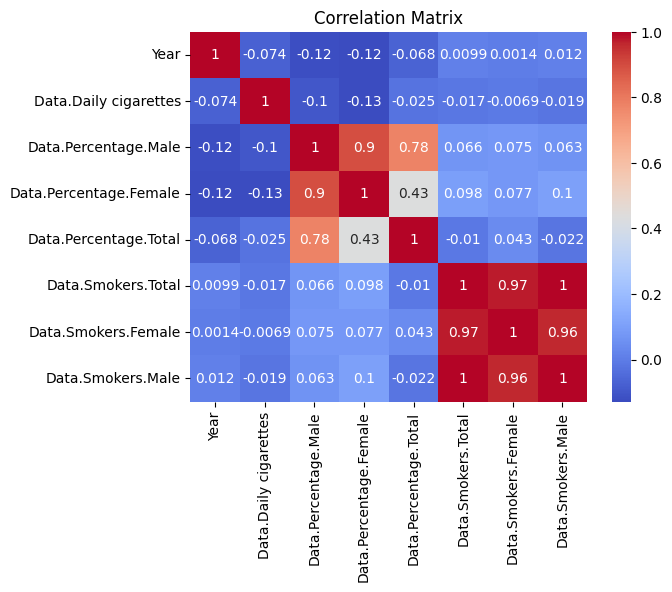

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns in your DataFrame
numeric_columns = df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



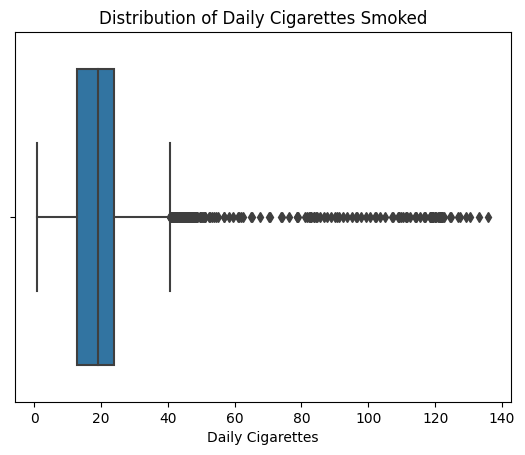

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Data.Daily cigarettes'])
plt.xlabel('Daily Cigarettes')
plt.title('Distribution of Daily Cigarettes Smoked')
plt.show()


In [63]:
from scipy import stats

male_cigarettes = df[df['Data.Percentage.Male'] > 0]['Data.Daily cigarettes']
female_cigarettes = df[df['Data.Percentage.Female'] > 0]['Data.Daily cigarettes']

t_stat, p_value = stats.ttest_ind(male_cigarettes, female_cigarettes, equal_var=False)
print(f"T-Stat: {t_stat:.2f}, P-Value: {p_value:.4f}")


T-Stat: 0.00, P-Value: 1.0000


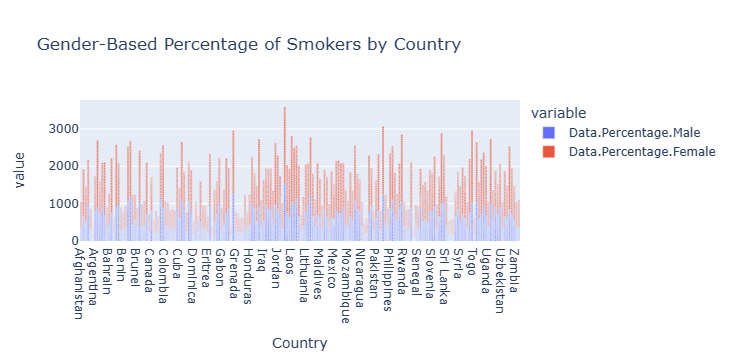

In [68]:
import plotly.express as px

fig = px.bar(df, x='Country', y=['Data.Percentage.Male', 'Data.Percentage.Female'], title='Gender-Based Percentage of Smokers by Country')
fig.show()


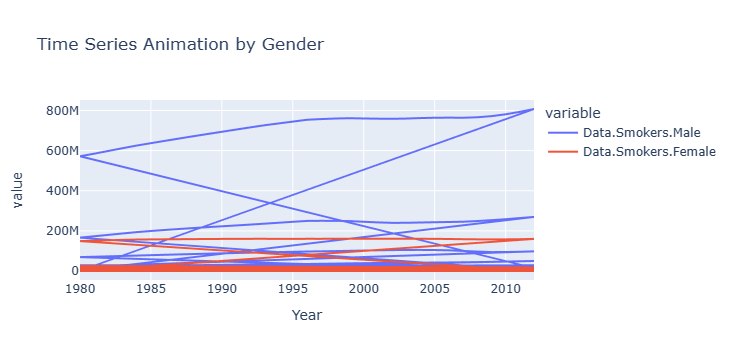

In [71]:
import plotly.express as px

fig = px.line(df, x='Year', y=['Data.Smokers.Male', 'Data.Smokers.Female'], title='Time Series Animation by Gender')
fig.show()


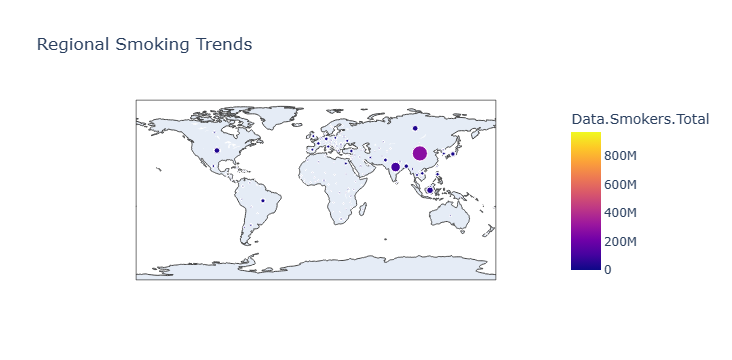

In [72]:
import plotly.express as px

fig = px.scatter_geo(df, locations="Country", locationmode='country names', color="Data.Smokers.Total",
                     size="Data.Smokers.Total", title='Regional Smoking Trends')
fig.show()


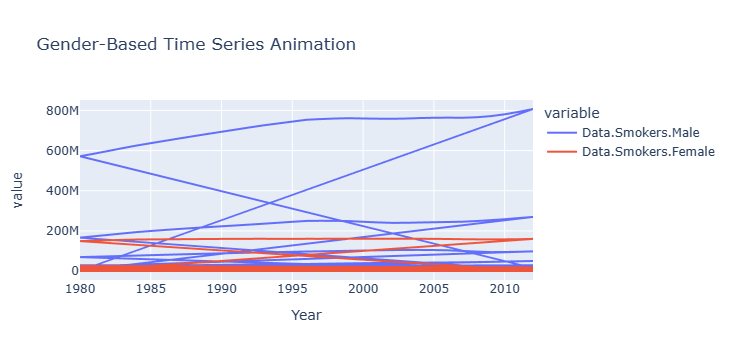

In [74]:
import plotly.express as px

fig = px.line(df, x='Year', y=['Data.Smokers.Male', 'Data.Smokers.Female'], title='Gender-Based Time Series Animation')
fig.show()


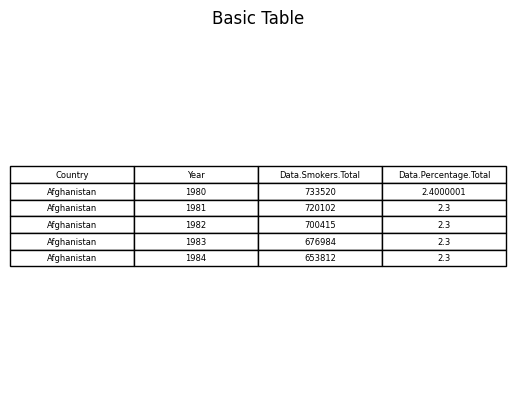

In [76]:
import matplotlib.pyplot as plt

# Select a subset of columns for the table
table_data = df[['Country', 'Year', 'Data.Smokers.Total', 'Data.Percentage.Total']].head()

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
plt.title('Basic Table')
plt.show()
